In [151]:
import pandas as pd
processed_df = pd.read_csv('processed_df_100000.csv')

In [152]:
processed_df.shape

(100000, 28)

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dill
from os.path import exists
from collections import defaultdict
%matplotlib inline
import math

import scipy
from scipy.stats import zscore
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [154]:
def get_dist_filename(dist_win, percent, offset):
    offset_str = ''
    if offset != 0: offset_str = str(offset) + '+'
    return 'dist_win_sel_' + str(dist_win) + '_' + offset_str + str(percent) + '.dat'

def get_time_filename(time_win, percent, offset):
    offset_str = ''
    if offset != 0: offset_str = str(offset) + '+'
    return 'time_win_sel_' + str(time_win) + '_' + offset_str  + str(percent) + '.dat'

def get_col_name(dist_win, time_win):
    return 'type_dist_' + str(dist_win) + '_time_' + str(time_win)

In [155]:
dist_params = [800, 400, 200, 100, 50]
time_params = [60, 30, 20, 10]
percent = 0.1
force = True
row_count = int(100000 * percent) * 10
x_cols = ['Latitude','Longitude','dow','hour','minute','second']

#processed_df = dill.load(open('processed_df_' + str(row_count) + '.dat', 'rb'))
print(processed_df.shape)
X = processed_df[[*x_cols]]
x_train = None
x_test = None
Ys_train = dict()
Ys_test = dict()
for dist_win in dist_params:
    for time_win in time_params:
        col_name = get_col_name(dist_win, time_win)
        print('dist: ' + str(dist_win) + ' | time: ' + str(time_win) + ' | col_name: ' + get_col_name(dist_win, time_win))
        assert(col_name in processed_df.columns)
        Y = processed_df[col_name]
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=2022, train_size=0.8)
        Ys_train[(dist_win, time_win)] = y_train
        Ys_test[(dist_win, time_win)] = y_test
processed_df
        

(100000, 28)
dist: 800 | time: 60 | col_name: type_dist_800_time_60
dist: 800 | time: 30 | col_name: type_dist_800_time_30
dist: 800 | time: 20 | col_name: type_dist_800_time_20
dist: 800 | time: 10 | col_name: type_dist_800_time_10
dist: 400 | time: 60 | col_name: type_dist_400_time_60
dist: 400 | time: 30 | col_name: type_dist_400_time_30
dist: 400 | time: 20 | col_name: type_dist_400_time_20
dist: 400 | time: 10 | col_name: type_dist_400_time_10
dist: 200 | time: 60 | col_name: type_dist_200_time_60
dist: 200 | time: 30 | col_name: type_dist_200_time_30
dist: 200 | time: 20 | col_name: type_dist_200_time_20
dist: 200 | time: 10 | col_name: type_dist_200_time_10
dist: 100 | time: 60 | col_name: type_dist_100_time_60
dist: 100 | time: 30 | col_name: type_dist_100_time_30
dist: 100 | time: 20 | col_name: type_dist_100_time_20
dist: 100 | time: 10 | col_name: type_dist_100_time_10
dist: 50 | time: 60 | col_name: type_dist_50_time_60
dist: 50 | time: 30 | col_name: type_dist_50_time_30
d

,Unnamed: 0,TYP_DESC,Latitude,Longitude,dow,hour,minute,second,type_dist_800_time_60,type_dist_800_time_30,...,type_dist_200_time_20,type_dist_200_time_10,type_dist_100_time_60,type_dist_100_time_30,type_dist_100_time_20,type_dist_100_time_10,type_dist_50_time_60,type_dist_50_time_30,type_dist_50_time_20,type_dist_50_time_10
0,0,VISIBILITY PATROL: DIRECTED,40.677802,-73.871348,0,3,29,46,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,VISIBILITY PATROL: DIRECTED,...,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED
1,1,VISIBILITY PATROL: DIRECTED,40.672100,-73.871114,0,15,56,56,ALL OUT DIRECTED,ALL OUT DIRECTED,...,ALL OUT DIRECTED,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,ALL OUT DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED
2,2,VISIBILITY PATROL: DIRECTED,40.672943,-73.870835,0,4,32,35,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,...,SEE COMPLAINANT: OTHER/INSIDE,SEE COMPLAINANT: OTHER/INSIDE,SEE COMPLAINANT: OTHER/INSIDE,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED
3,3,VISIBILITY PATROL: DIRECTED,40.672943,-73.870835,0,15,55,38,TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP,TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP,...,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED
4,4,VISIBILITY PATROL: DIRECTED,40.669050,-73.870359,0,0,24,36,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,...,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: DIRECTED,ALL OUT DIRECTED,ALL OUT DIRECTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,40.674136,-73.922093,1,9,19,39,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,...,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: DIRECTED,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT
99996,99996,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,40.667179,-73.918860,1,16,10,12,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,...,DISPUTE: INSIDE,SEE COMPLAINANT: OTHER/INSIDE,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT
99997,99997,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,40.680745,-73.916760,1,2,18,40,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,...,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: FAMILY/HOME VISIT,VISIBILITY PATROL: DIRECTED
99998,99998,INVESTIGATE/POSSIBLE CRIME: CALLS FOR HELP/INSIDE,40.6598

In [227]:
groupbydata=processed_df.groupby(['TYP_DESC']).count()
crime_10=groupbydata['Unnamed: 0'].sort_values(ascending=False).head(10)

In [233]:
crime_10

TYP_DESC
VISIBILITY PATROL: DIRECTED                       26249
SEE COMPLAINANT: OTHER/INSIDE                     10500
STATION INSPECTION BY TRANSIT BUREAU PERSONNEL     7734
TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP           4926
INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER          4712
TRAIN ORDER MAINTENANCE SWEEP (TOMS)               3997
COMMUNITY TIME                                     3922
VISIBILITY PATROL: FAMILY/HOME VISIT               3712
SEE COMPLAINANT: OTHER/OUTSIDE                     1737
VEHICLE ACCIDENT: SPECIAL CONDITION                1428
Name: Unnamed: 0, dtype: int64

<BarContainer object of 10 artists>

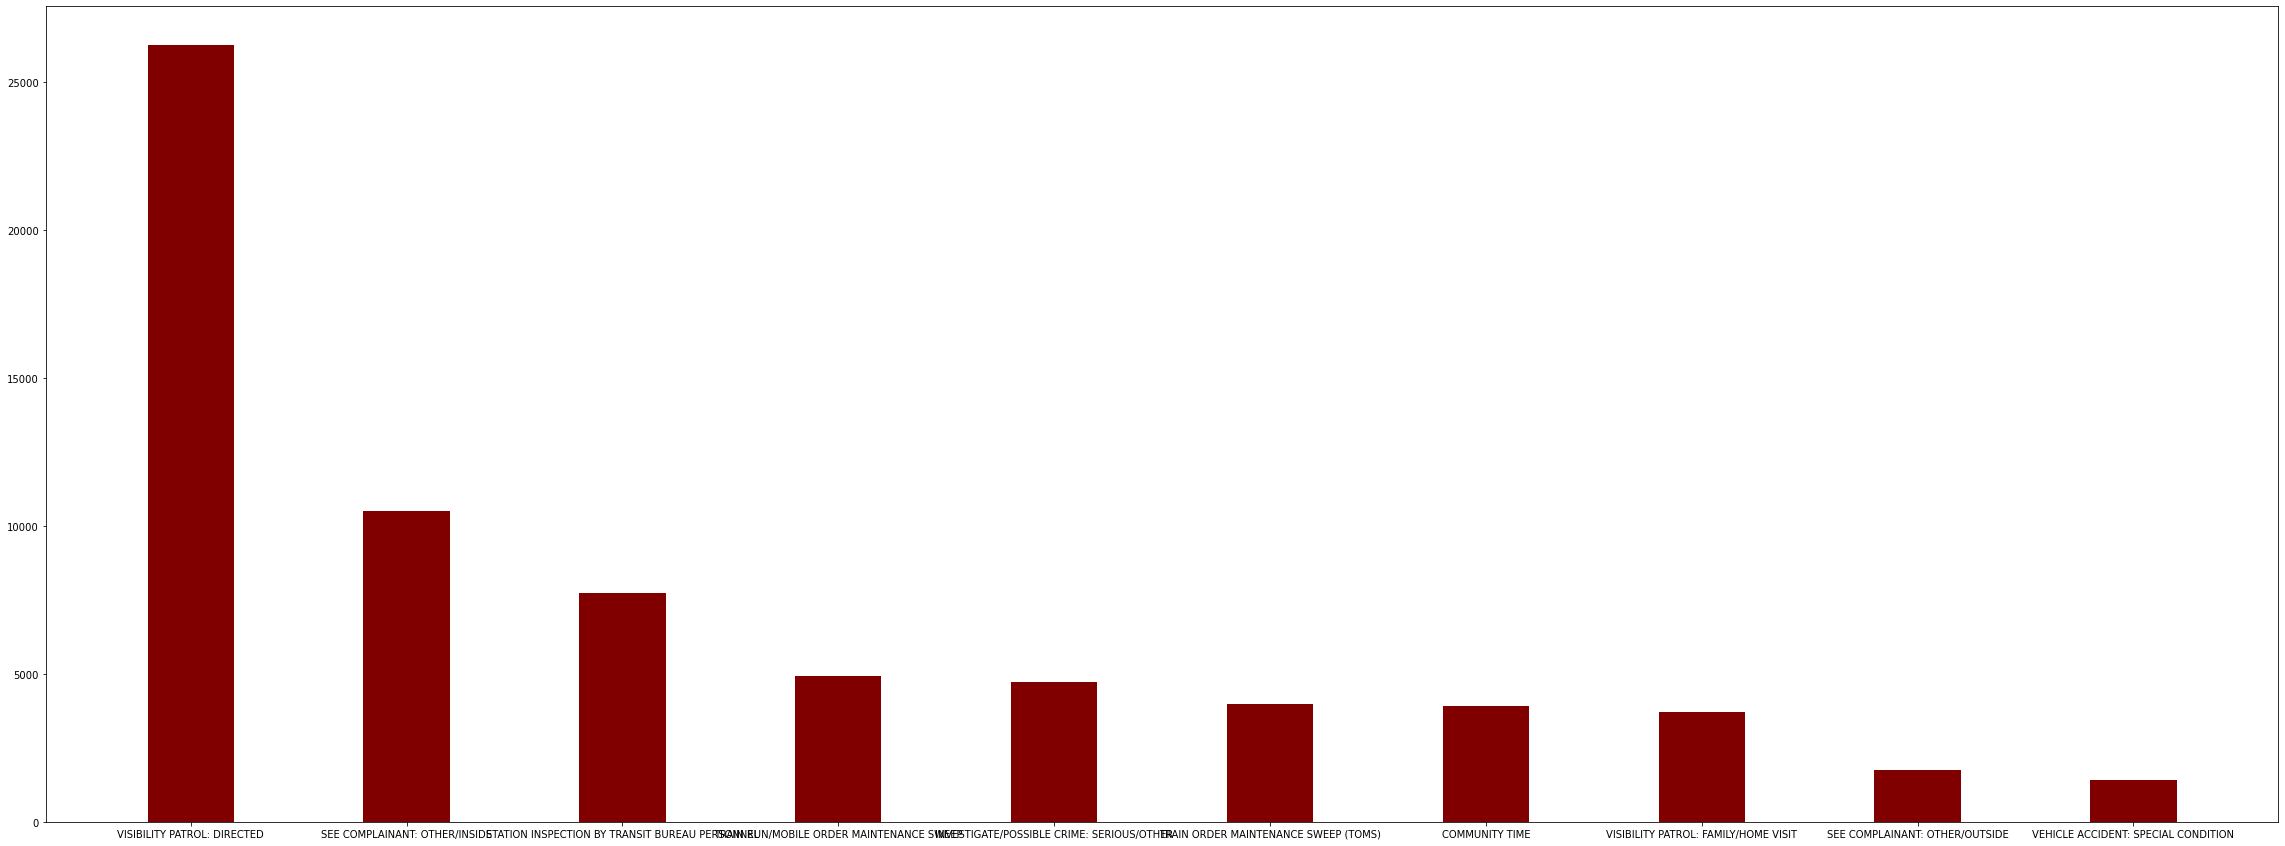

In [228]:
plt.figure(figsize=(40,15))
plt.bar(crime_10.index, crime_10.values, color ='maroon',
        width = 0.4)

In [156]:
import math
def objFunction(acc,c,dist_win,time_win):
    
    return acc-c*(math.log(dist_win)+math.log(time_win))

In [157]:
import math
def objFunction_2(acc,c,dist_win,time_win):
    
    return acc-c*((dist_win)+(time_win))

In [158]:
import math
def objFunction_3(acc,c,dist_win,time_win):

    return acc-c*((dist_win)**2+10*(time_win)**2)

In [159]:
def objFunction_4(acc,c,dist_win,time_win):
    return acc - c * (dist_win ** 2 + (8 * time_win) ** 2)

In [160]:
from sklearn.naive_bayes import GaussianNB
global loss
global accur
global c
c = 0.00000033
loss=[]
accur=[]
lg_accuracy=dict()
def naiveB_1 (window, x_train, x_test, y_train, y_test) :
    gnb = GaussianNB()
    y_pred = gnb.fit(x_train, y_train).predict(x_test)
    accur.append((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0])
    
    lg_accuracy[window] = gnb.score(x_test,y_test)
    print(str(window) + "Number of mislabeled points out of a total %d points : %d"
          % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy: "+ str(accur))
    loss.append(objFunction((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win))
    print('Loss '+ str(objFunction((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win)))

In [161]:
global loss
global accur
global c
c = 0.00000033
loss=[]
accur=[]
def naiveB_2 (window, x_train, x_test, y_train, y_test) :
    gnb = GaussianNB()
    y_pred = gnb.fit(x_train, y_train).predict(x_test)
    accur.append((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0])
    print(str(window) + "Number of mislabeled points out of a total %d points : %d"
          % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy: "+ str(accur))
    loss.append(objFunction_2((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win))
    print('Loss '+ str(objFunction_2((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win)))

In [162]:
global loss
global accur
global c
c = 0.00000033
loss=[]
accur=[]
def naiveB_3 (window, x_train, x_test, y_train, y_test) :
    gnb = GaussianNB()
    y_pred = gnb.fit(x_train, y_train).predict(x_test)
    accur.append((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0])
    print(str(window) + "Number of mislabeled points out of a total %d points : %d"
          % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy: "+ str(accur))
    loss.append(objFunction_3((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win))
    print('Loss '+ str(objFunction_3((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win)))

In [328]:
global loss
global accur
global c
c = 0.00000033
loss=[]
accur=[]
lg_accuracy=dict()
def naiveB_4 (window, x_train, x_test, y_train, y_test) :
    gnb = GaussianNB()
    y_pred = gnb.fit(x_train, y_train).predict(x_test)
    accur.append((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0])
    
    lg_accuracy[window] = gnb.score(x_test,y_test)
    print(str(window) + "Number of mislabeled points out of a total %d points : %d"
          % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy: "+ str(accur))
    loss.append(objFunction_4((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win))
    print('Loss '+ str(objFunction_4((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win)))

In [335]:
#baseline model
#x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(X, Y, random_state=2022, train_size=0.8)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_base = gnb.fit(x_train_base, y_train_base).predict(x_test_base)
acc_base=(x_test_base.shape[0]-(y_test_base != y_pred_base).sum())/x_test_base.shape[0]
print(acc_base)

0.25855


In [329]:
from sklearn.model_selection import train_test_split

# Baseline, zero window size
Y = processed_df['TYP_DESC']
x_train_base, x_test_base, y_train_base, y_test_base = train_test_split(X, Y, random_state=2022, train_size=0.8)
# Train base models

# To access training and testing data for windows, use:
# x_train
# x_test
# Ys_train[(dist_win, time_win)]
# Ys_test[(dist_win, time_win)]

for dist_win in dist_params:
    for time_win in time_params:
        window = (dist_win, time_win)
        x_train
        x_test
        y_train = Ys_train[window]
        y_test = Ys_test[window]
        naiveB_4(window,x_train, x_test, y_train, y_test)
        # Train window models

(800, 60)Number of mislabeled points out of a total 20000 points : 8939
Accuracy: [0.55305]
Loss 0.26581800000000005
(800, 30)Number of mislabeled points out of a total 20000 points : 10167
Accuracy: [0.55305, 0.49165]
Loss 0.26144199999999995
(800, 20)Number of mislabeled points out of a total 20000 points : 10655
Accuracy: [0.55305, 0.49165, 0.46725]
Loss 0.247602
(800, 10)Number of mislabeled points out of a total 20000 points : 12526
Accuracy: [0.55305, 0.49165, 0.46725, 0.3737]
Loss 0.16038799999999998
(400, 60)Number of mislabeled points out of a total 20000 points : 11791
Accuracy: [0.55305, 0.49165, 0.46725, 0.3737, 0.41045]
Loss 0.281618
(400, 30)Number of mislabeled points out of a total 20000 points : 13225
Accuracy: [0.55305, 0.49165, 0.46725, 0.3737, 0.41045, 0.33875]
Loss 0.266942
(400, 20)Number of mislabeled points out of a total 20000 points : 13821
Accuracy: [0.55305, 0.49165, 0.46725, 0.3737, 0.41045, 0.33875, 0.30895]
Loss 0.247702
(400, 10)Number of mislabeled poin

In [330]:
norm_acc=[]
norm_loss=[]
norm_loss = [float(i)/sum(loss) for i in loss]
norm_acc=[float(i)/sum(accur) for i in accur]

In [331]:
combination=[]
for dist_win in dist_params:
    for time_win in time_params:
        window = (dist_win, time_win)
        
        combination.append(str(window))

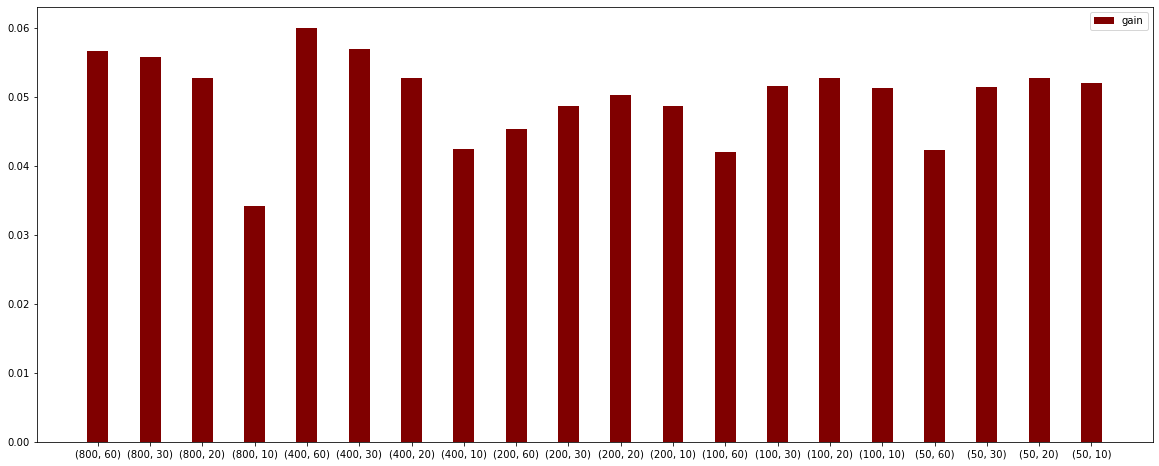

In [332]:
plt.figure(figsize=(20,8))
plt.bar(combination, norm_loss, color ='maroon',label='gain',
        width = 0.4)
plt.legend()

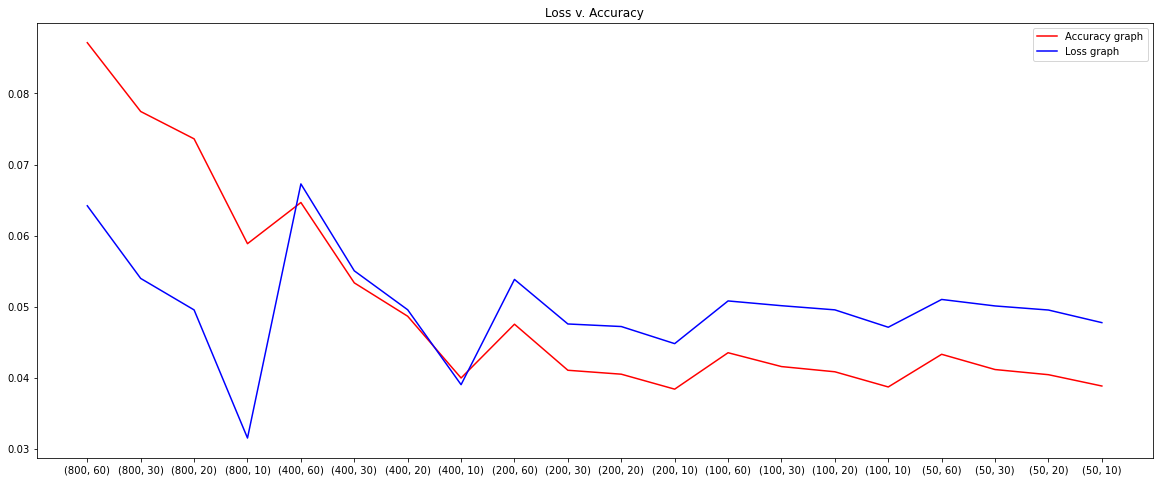

In [169]:
#using the first objective function
plt.figure(figsize=(20,8))
plt.plot(combination,norm_acc, label='Accuracy graph',color="r")
plt.plot(combination,norm_loss, label='Loss graph',color="blue")

plt.title('Loss v. Accuracy')
plt.legend()
plt.show()
plt.close()

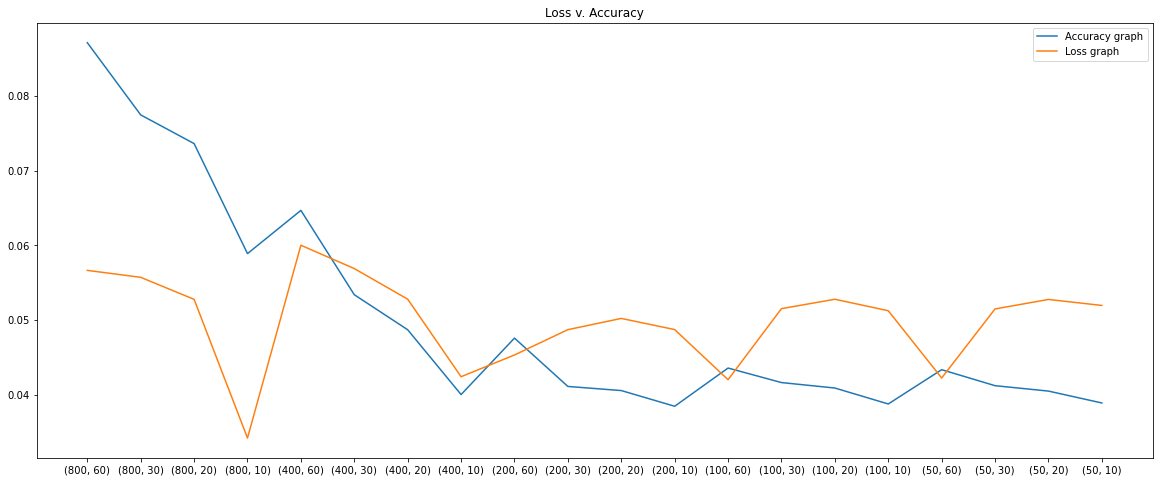

In [327]:
#using the second objective function
plt.figure(figsize=(20,8))
plt.plot(combination,norm_acc, label='Accuracy graph')
plt.plot(combination,norm_loss, label='Loss graph')


plt.title('Loss v. Accuracy')
plt.legend()
plt.show()
plt.close()

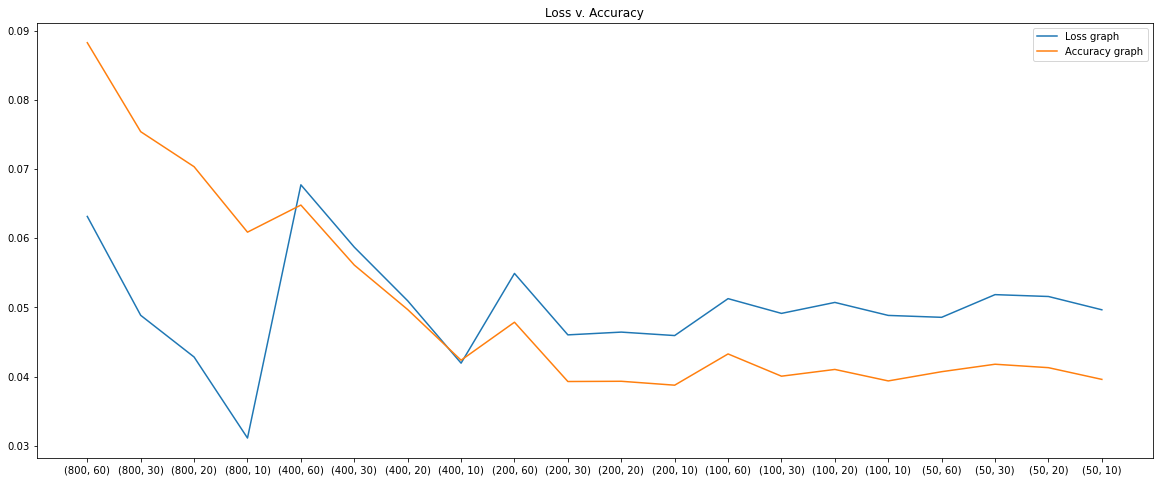

In [32]:
#using the third objective function
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20,8))
plt.plot(combination,norm_loss, label='Loss graph')
plt.plot(combination,norm_acc, label='Accuracy graph')

plt.title('Loss v. Accuracy')
plt.legend()
plt.show()
plt.close()

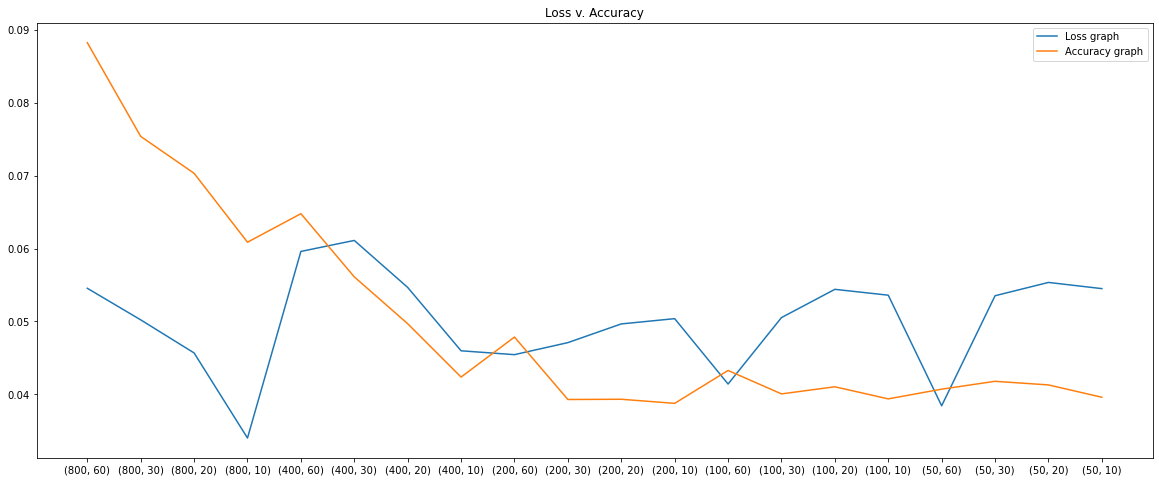

In [41]:
#using the fourth objective function
plt.figure(figsize=(20,8))
plt.plot(combination,norm_loss, label='Loss graph')
plt.plot(combination,norm_acc, label='Accuracy graph')

plt.title('Loss v. Accuracy')
plt.legend()
plt.show()
plt.close()

In [235]:
y_test_prob = Ys_test[400,60]

In [251]:
y_train_prob = Ys_train[400,60]
gnb = GaussianNB()
y_pred_prob = gnb.fit(x_train, y_train_prob).predict_proba(x_test)
y_pred_prob.shape

(20000, 236)

In [278]:
y_train_prob

56308                 BURGLARY (IN PROGRESS): RESIDENCE
73350             ASSIST POLICE OFFICER: UNIFORM/INSIDE
50943    STATION INSPECTION BY TRANSIT BUREAU PERSONNEL
5756                        VISIBILITY PATROL: DIRECTED
50377                       VISIBILITY PATROL: DIRECTED
                              ...                      
71920                       VISIBILITY PATROL: DIRECTED
46769               ASSAULT (IN PROGRESS): KNIFE/INSIDE
16557                     SEE COMPLAINANT: OTHER/INSIDE
1244                      SEE COMPLAINANT: OTHER/INSIDE
86909                       VISIBILITY PATROL: DIRECTED
Name: type_dist_400_time_60, Length: 80000, dtype: object

In [276]:
b=y_train_prob.value_counts()
y_train_prob.value_counts()
b.index

Index(['VISIBILITY PATROL: DIRECTED', 'SEE COMPLAINANT: OTHER/INSIDE',
       'STATION INSPECTION BY TRANSIT BUREAU PERSONNEL',
       'TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP',
       'TRAIN ORDER MAINTENANCE SWEEP (TOMS)', 'COMMUNITY TIME',
       'VISIBILITY PATROL: FAMILY/HOME VISIT',
       'INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER',
       'AMBULANCE CASE: EDP/INSIDE', 'ALL OUT DIRECTED',
       ...
       'OTHER NON-CRIME INCIDENT (SPECIFY): TRANSIT',
       'AMBULANCE CASE: HEAVY BLEEDING/OUTSIDE',
       'OTHER CRIMES (PAST): TRESPASS/OUTSIDE',
       'INVESTIGATE/POSSIBLE CRIME: NARCO SALES/TRANSIT',
       'INVESTIGATE/POSSIBLE CRIME: FIREARM/LTD ACC HWY',
       'ASSAULT (PAST): OTHER/TRANSIT',
       'BURGLARY (IN PROGRESS): OTHER/TRANSIT',
       'ASSAULT (PAST): OTHER/CHILD ABUSE', 'FIRE: EXPLOSION/LTD ACC HWY',
       'OTHER'],
      dtype='object', length=236)

In [272]:
names=[]
for i in y_train_prob:
    if i not in names:
        names.append(i)

In [274]:
df = pd.DataFrame(y_pred_prob, columns = names)

In [275]:
df

,BURGLARY (IN PROGRESS): RESIDENCE,ASSIST POLICE OFFICER: UNIFORM/INSIDE,STATION INSPECTION BY TRANSIT BUREAU PERSONNEL,VISIBILITY PATROL: DIRECTED,COMMUNITY TIME,SEE COMPLAINANT: OTHER/INSIDE,TRAIN RUN/MOBILE ORDER MAINTENANCE SWEEP,AMBULANCE CASE: EDP/INSIDE,INVESTIGATE/POSSIBLE CRIME: SERIOUS/OTHER,ASSAULT (PAST): OTHER/INSIDE,...,INVESTIGATE/POSSIBLE CRIME: FIREARM/LTD ACC HWY,AMBULANCE CASE: UNCONSCIOUS/LTD ACC HWY,OTHER-CRIME INCIDENT: MARIJUANA/INSIDE,INVESTIGATE/POSSIBLE CRIME: OTHER/INSIDE,FIRE: STORE,ASSAULT (IN PROGRESS): KNIFE/LTD ACC HWY,OTHER,AMBULANCE CASE: SERIOUS/LTD ACC HWY,SUSP PACKAGE: LTD ACC HWY,ASSAULT (PAST): WEAPON/OUTSIDE
0,6.186118e-06,0.000018,0.000678,0.000282,0.000355,2.505920e-06,0.012756,0.000372,0.0,0.000363,...,0.000215,0.003196,0.000203,0.535593,0.033448,0.003480,1.635610e-04,2.452491e-13,0.000927,3.808735e-09
1,1.792893e-10,0.000216,0.000956,0.000217,0.000455,5.417082e-06,0.009520,0.000316,0.0,0.000023,...,0.000306,0.001693,0.000128,0.346550,0.024788,0.001708,1.442144e-05,4.197775e-08,0.003183,3.625292e-06
2,4.964858e-11,0.000254,0.001197,0.000515,0.000670,8.483006e-07,0.014168,0.000489,0.0,0.000121,...,0.000727,0.001486,0.000193,0.403237,0.034120,0.002164,8.114124e-06,4.566714e-10,0.005190,3.258003e-05
3,2.013710e-09,0.000009,0.000554,0.000198,0.000580,4.360091e-06,0.010811,0.000399,0.0,0.004329,...,0.000096,0.006493,0.000212,0.524581,0.037454,0.005752,8.540139e-05,3.968847e-24,0.000417,1.154727e-13
4,4.035646e-11,0.000097,0.001966,0.000149,0.000512,7.227658e-08,0.003893,0.000346,0.0,0.000128,...,0.000110,0.002124,0.000027,0.539426,0.028738,0.004208,8.957983e-05,3.052131e-82,0.003906,1.362099e-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.502587e-16,0.000218,0.001547,0.000348,0.000850,4.669349e-04,0.008453,0.000351,0.0,0.000211,...,0.000209,0.001806,0.000199,0.370278,0.032742,0.002697,1.412768e-04,1.530391e-20,0.010334,2.070740e-10
19996,6.417996e-09,0.000705,0.001431,0.000163,0.001372,3.091635e-09,0.008984,0.000525,0.0,0.000057,...,0.000440,0.001136,0.000238,0.382921,0.034462,0.002154,5.297944e-07,1.367409e-04,0.003610,6.318671e-04
19997,4.995708e-11,0.000363,0.002106,0.000153,0.002005,1.269048e-03,0.008140,0.000582,0.0,0.000213,...,0.000295,0.001842,0.000165,0.360600,0.035721,0.002992,3.233942e-05,2.066680e-27,0.009828,1.485077e-13
19998,1.602347e-04,0.000144,0.001231,0.000108,0.000158,7.568403e-14,0.005300,0.000439,0.0,0.000018,...,0.000182,0.000645,0.000238,0.386617,0.033419,0.002096,1.921340e-07,2.213594e-08,0.002348,9.658155e-05


In [281]:
top_10

INVESTIGATE/POSSIBLE CRIME: OTHER/INSIDE       0.424909
LARCENY (PAST): FROM PERSON/TRANSIT            0.125301
LARCENY (IN PROGRESS): FROM PERSON/INSIDE      0.089673
AMBULANCE CASE: BURN SERIOUS/OUTSIDE           0.040404
INVESTIGATE/POSSIBLE CRIME: FIREARM/OUTSIDE    0.038639
Name: 5462, dtype: float64

In [287]:
one_row

BURGLARY (IN PROGRESS): RESIDENCE                 6.461806e-11
ASSIST POLICE OFFICER: UNIFORM/INSIDE             3.292090e-04
STATION INSPECTION BY TRANSIT BUREAU PERSONNEL    2.090891e-03
VISIBILITY PATROL: DIRECTED                       1.189867e-04
COMMUNITY TIME                                    2.472611e-03
                                                      ...     
ASSAULT (IN PROGRESS): KNIFE/LTD ACC HWY          3.225317e-03
OTHER                                             3.669619e-05
AMBULANCE CASE: SERIOUS/LTD ACC HWY               9.369393e-28
SUSP PACKAGE: LTD ACC HWY                         8.119613e-03
ASSAULT (PAST): WEAPON/OUTSIDE                    7.456609e-14
Name: 19000, Length: 236, dtype: float64

<BarContainer object of 10 artists>

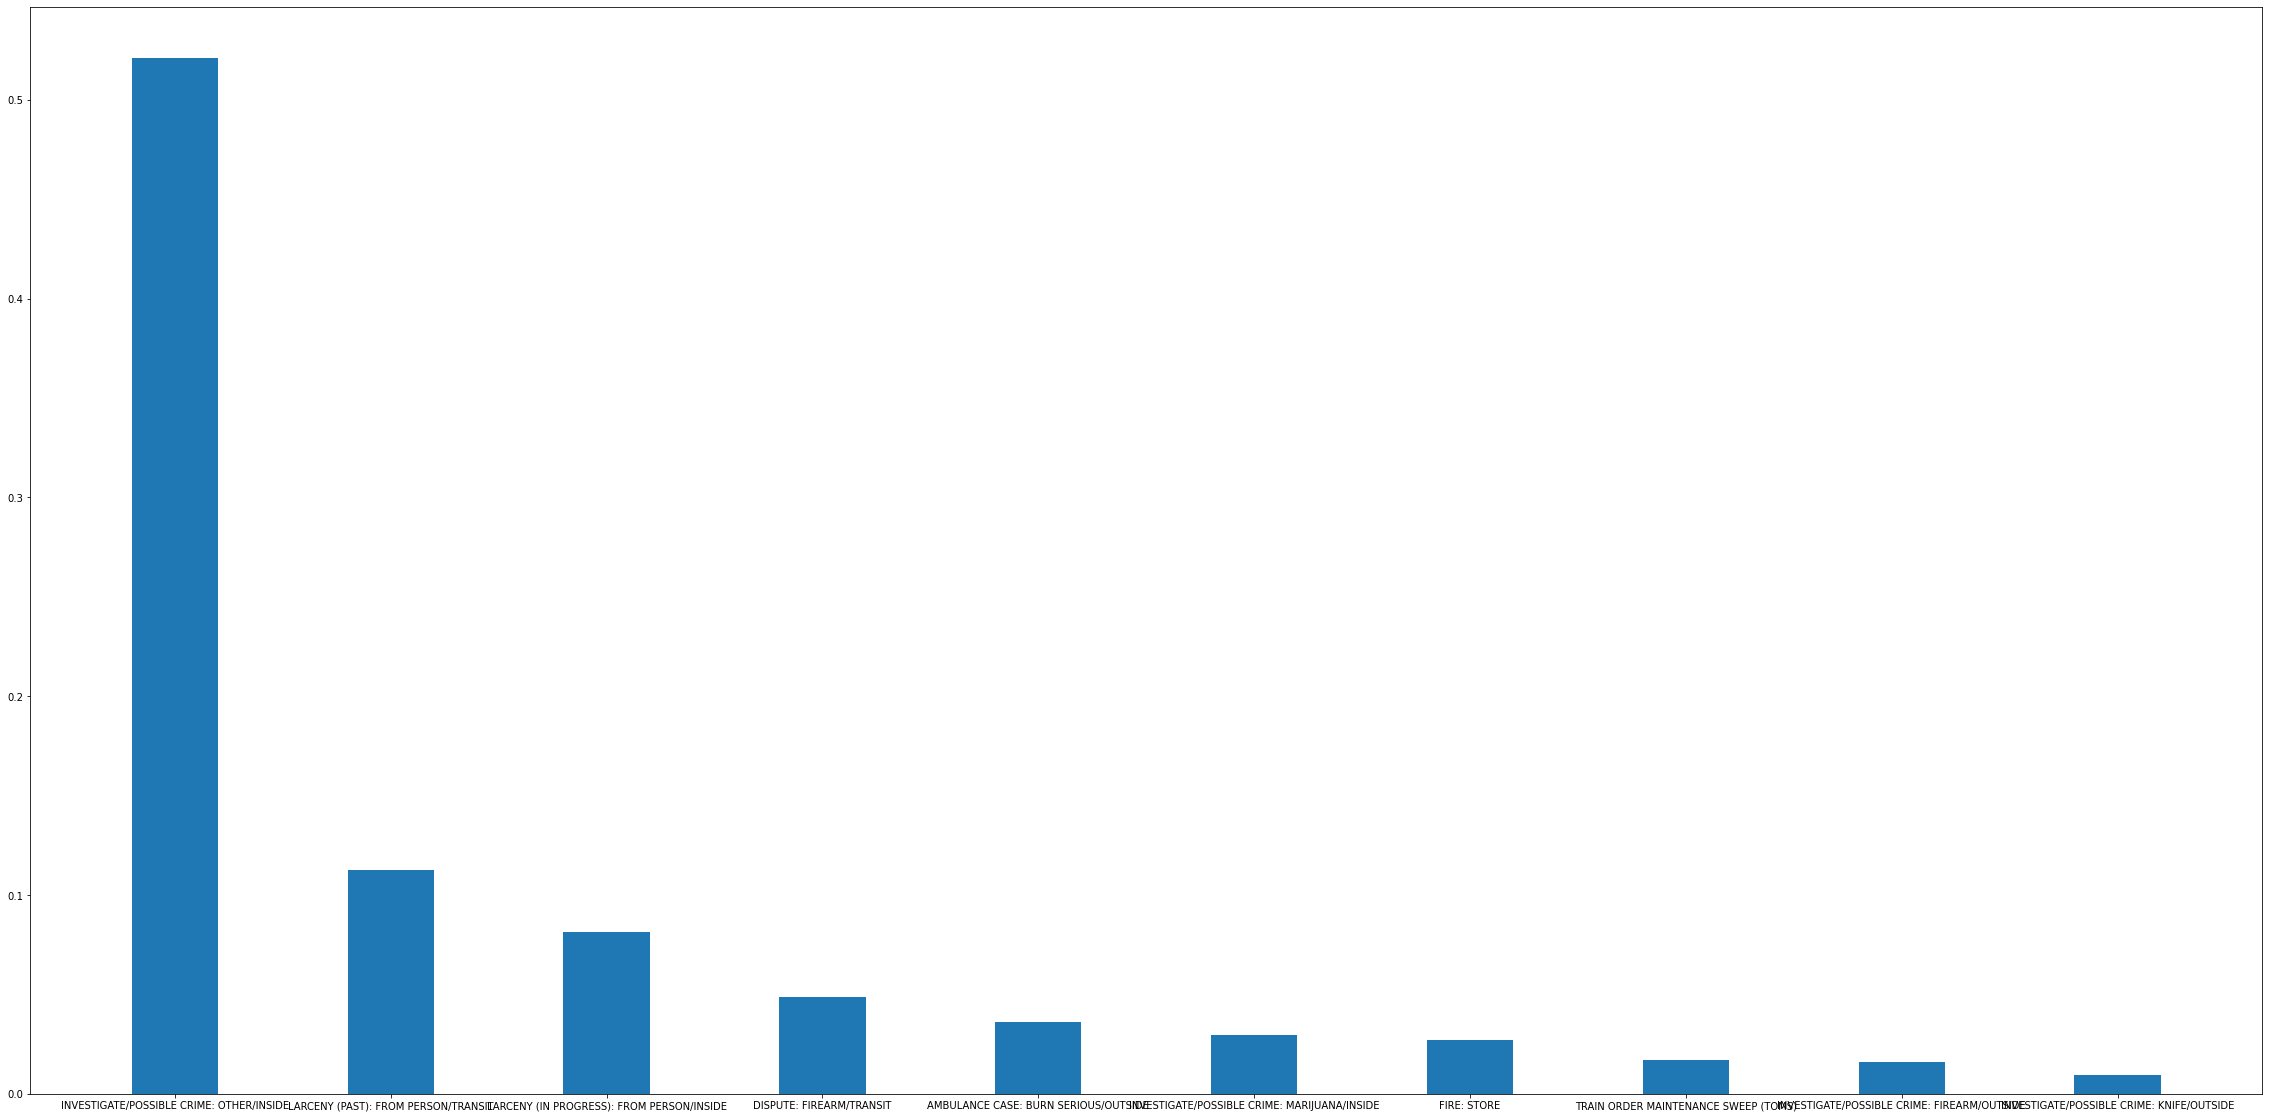

In [290]:
one_row=df.iloc[1605]
top_10=one_row.sort_values(ascending=False).head(10)
plt.figure(figsize=(40,20))
plt.bar(top_10.index, top_10.values,
        width = 0.4)

<BarContainer object of 5 artists>

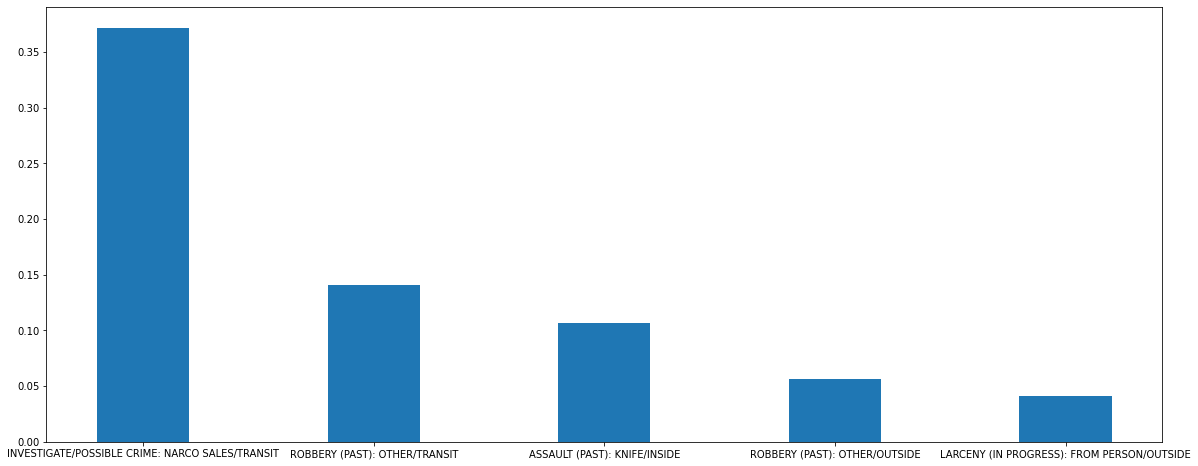

In [266]:
one_row=df.iloc[9123]
top_10=one_row.sort_values(ascending=False).head(5)
plt.figure(figsize=(20,8))
plt.bar(top_10.index, top_10.values,
        width = 0.4)

<BarContainer object of 5 artists>

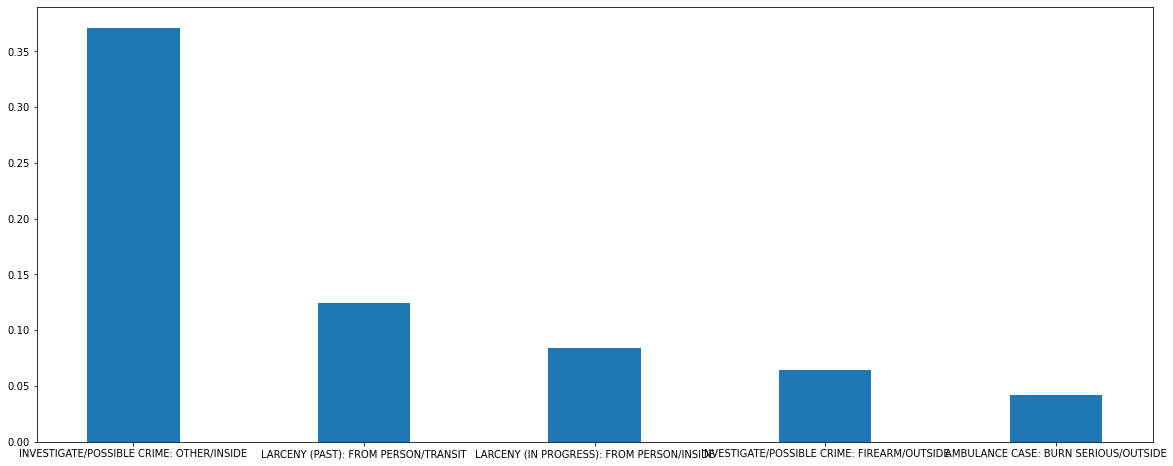

In [286]:
one_row=df.iloc[19000]
top_10=one_row.sort_values(ascending=False).head(5)
plt.figure(figsize=(20,8))
plt.bar(top_10.index, top_10.values,
        width = 0.4)

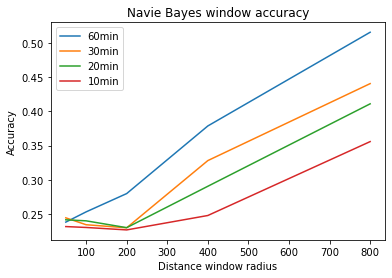

In [120]:
for time_win in time_params:
    plt.plot(dist_params, [lg_accuracy[(dist_win, time_win)] for dist_win in dist_params], label = str(time_win)+'min')
plt.xlabel('Distance window radius')
plt.ylabel('Accuracy')
plt.title('Navie Bayes window accuracy')
plt.legend()
plt.show()

In [126]:
windows = [(0,0)]
for dist_win in dist_params:
    for time_win in time_params:
        windows.append((dist_win, time_win))

In [333]:
acc_results = pd.DataFrame(columns=['Window'])
acc_results['Window'] = windows
acc = []
for win in windows:
    acc.append(round(lg_accuracy[win], 2))
acc_results['Accuracy'] = acc
acc = []
base_acc = acc_base
for win in windows:
    win_acc = lg_accuracy[win]
    acc.append(round((win_acc - base_acc) / base_acc * 100, 2))
acc_results['Percent improvement'] = acc
gain = []
for win in windows:
    gain.append(round(objFunction_3(lg_accuracy[win], c, dist_win, time_win), 2))
acc_results['Objective gain'] = gain
acc_results

,Window,Accuracy,Percent improvement,Objective gain
0,"(800, 60)",0.55,139.83,0.55
1,"(800, 30)",0.49,113.20,0.49
2,"(800, 20)",0.47,102.62,0.47
3,"(800, 10)",0.37,62.06,0.37
4,"(400, 60)",0.41,77.99,0.41
5,"(400, 30)",0.34,46.90,0.34
6,"(400, 20)",0.31,33.98,0.31
7,"(400, 10)",0.25,10.08,0.25
8,"(200, 60)",0.30,30.90,0.30
9,"(200, 30)",0.26,13.07,0.26


In [370]:
acc_results.to_csv("KNN_50 accuracy.csv")

In [364]:
from sklearn.neighbors import KNeighborsClassifier
global loss
global accur
global c
c = 0.00000033
loss=[]
accur=[]
lg_accuracy=dict()
def KNN (window, x_train, x_test, y_train, y_test) :
    neigh = KNeighborsClassifier(n_neighbors=50)
    y_pred = neigh.fit(x_train, y_train).predict(x_test)
    accur.append((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0])
    
    lg_accuracy[window] = neigh.score(x_test,y_test)
    print(str(window) + "Number of mislabeled points out of a total %d points : %d"
          % (x_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy: "+ str(accur))
    loss.append(objFunction_4((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win))
    print('Loss '+ str(objFunction_4((x_test.shape[0]-(y_test != y_pred).sum())/x_test.shape[0],c,dist_win,time_win)))

In [365]:
for dist_win in dist_params:
    for time_win in time_params:
        window = (dist_win, time_win)
        x_train
        x_test
        y_train = Ys_train[window]
        y_test = Ys_test[window]
        KNN(window,x_train, x_test, y_train, y_test)
        # Train window models

(800, 60)Number of mislabeled points out of a total 20000 points : 8542
Accuracy: [0.5729]
Loss 0.285668
(800, 30)Number of mislabeled points out of a total 20000 points : 9827
Accuracy: [0.5729, 0.50865]
Loss 0.278442
(800, 20)Number of mislabeled points out of a total 20000 points : 10659
Accuracy: [0.5729, 0.50865, 0.46705]
Loss 0.247402
(800, 10)Number of mislabeled points out of a total 20000 points : 12293
Accuracy: [0.5729, 0.50865, 0.46705, 0.38535]
Loss 0.17203800000000002
(400, 60)Number of mislabeled points out of a total 20000 points : 11729
Accuracy: [0.5729, 0.50865, 0.46705, 0.38535, 0.41355]
Loss 0.28471799999999997
(400, 30)Number of mislabeled points out of a total 20000 points : 12953
Accuracy: [0.5729, 0.50865, 0.46705, 0.38535, 0.41355, 0.35235]
Loss 0.280542
(400, 20)Number of mislabeled points out of a total 20000 points : 13616
Accuracy: [0.5729, 0.50865, 0.46705, 0.38535, 0.41355, 0.35235, 0.3192]
Loss 0.25795199999999996
(400, 10)Number of mislabeled points ou

In [366]:
norm_acc=[]
norm_loss=[]
norm_loss = [float(i)/sum(loss) for i in loss]
norm_acc=[float(i)/sum(accur) for i in accur]

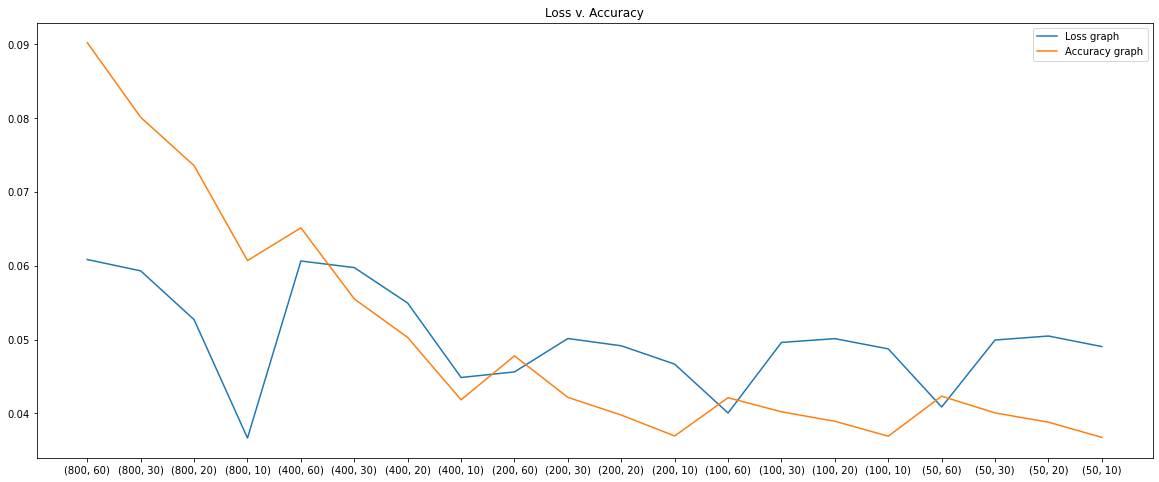

In [367]:
#using the fourth objective function
plt.figure(figsize=(20,8))
plt.plot(combination,norm_loss, label='Loss graph')
plt.plot(combination,norm_acc, label='Accuracy graph')

plt.title('Loss v. Accuracy')
plt.legend()
plt.show()
plt.close()

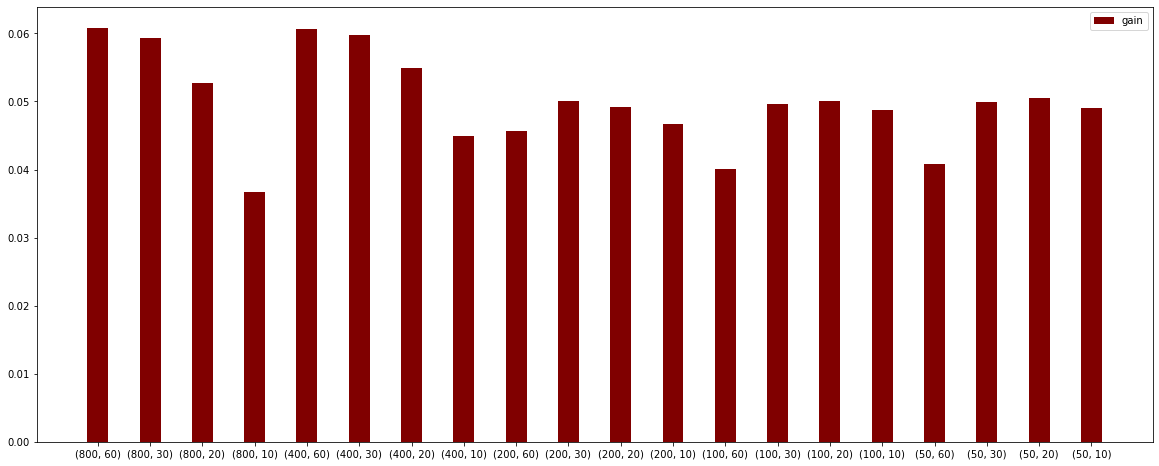

In [368]:
plt.figure(figsize=(20,8))
plt.bar(combination, norm_loss, color ='maroon',label='gain',
        width = 0.4)
plt.legend()

In [369]:
acc_results = pd.DataFrame(columns=['Window'])
acc_results['Window'] = windows
acc = []
for win in windows:
    acc.append(round(lg_accuracy[win], 2))
acc_results['Accuracy'] = acc
acc = []
base_acc = acc_base
for win in windows:
    win_acc = lg_accuracy[win]
    acc.append(round((win_acc - base_acc) / base_acc * 100, 2))
acc_results['Percent improvement'] = acc
gain = []
for win in windows:
    gain.append(round(objFunction_3(lg_accuracy[win], c, dist_win, time_win), 2))
acc_results['Objective gain'] = gain
acc_results

,Window,Accuracy,Percent improvement,Objective gain
0,"(800, 60)",0.57,121.58,0.57
1,"(800, 30)",0.51,96.73,0.51
2,"(800, 20)",0.47,80.64,0.47
3,"(800, 10)",0.39,49.04,0.38
4,"(400, 60)",0.41,59.95,0.41
5,"(400, 30)",0.35,36.28,0.35
6,"(400, 20)",0.32,23.46,0.32
7,"(400, 10)",0.27,2.69,0.26
8,"(200, 60)",0.30,17.33,0.30
9,"(200, 30)",0.27,3.50,0.27


In [ ]:
#5,20,50,200